# Table of Contents
1. Import libraries
2. Import data: ords_prods_merge_extrarows.pkl
3. Create a user defined function for price_label
4. Create 'price_range_loc' value from 'prices' using loc()
5. Create 'busiest_day' value from 'order_day_of_week' frequency using For Loop
6. Bar chart visualization for busiest_day
7. Create new 'day_type' value from 'order_day_of_week' frequency ranges using For Loop
8. Create new 'busiest_period_of_day' value from 'order_hour_of_day' frequency ranges using For Loop

# Import Libraries

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import os

# Import Data

In [2]:
# define path
path = r'/users/stephenhelvig/documents/python projects/instacart basket analysis'

In [3]:
# import ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_extrarows.pkl'))

# Create a user defined function for price_label

In [4]:
# user defined function: price_label

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range product'
  else: return 'np.nan'

# Create 'price_range_loc' value from 'prices' using loc()

In [5]:
# running loc() on entire dataframe (ords_prods_merge)

In [6]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [7]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [8]:
ords_prods_merge.loc[ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [9]:
ords_prods_merge['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21890979
Low-range product     10125828
High-range product      417682
Name: count, dtype: int64

# Create 'busiest_day' value from 'order_day_of_week' frequency using For Loop

In [10]:
# Count orders per day of week
ords_prods_merge['order_day_of_week'].value_counts(dropna = False)

order_day_of_week
0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: count, dtype: int64

In [11]:
# Define the for loop. Assign new values to a new variable 'result'
result = []

for value in ords_prods_merge['order_day_of_week']:
  if value == 0:
    result.append('Busiest day')
  elif value == 4:
    result.append('Least busy')
  else:
    result.append('Regularly busy')

In [12]:
# apply the values in variable result to the busiest_day column
rds_prods_merge['busiest_day'] = result

In [13]:
# check output
ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22437608
Busiest day        6209666
Least busy         3787215
Name: count, dtype: int64

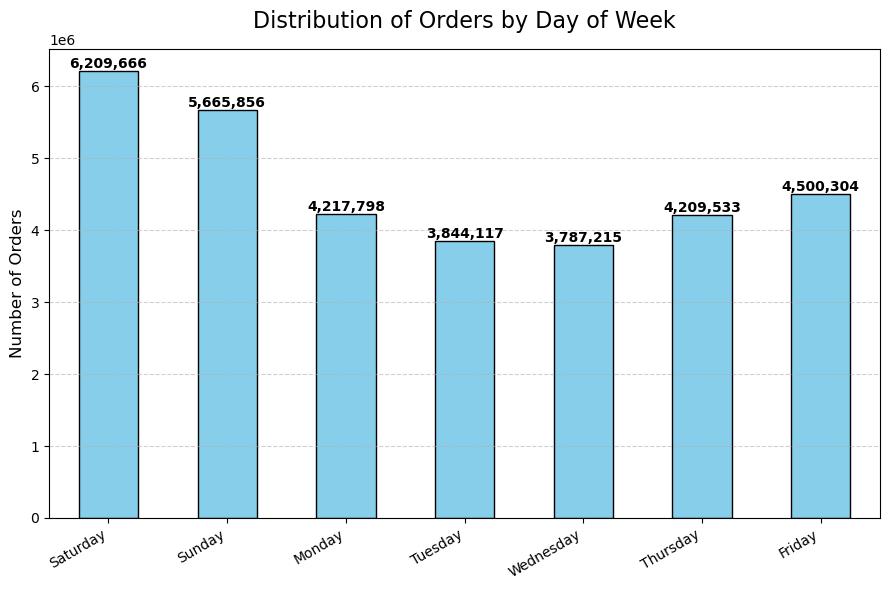

In [20]:
# creating bar chart visualization

# Map 0–6 to weekdays, starting with Saturday
day_map = {
    0: "Saturday", 
    1: "Sunday", 
    2: "Monday", 
    3: "Tuesday", 
    4: "Wednesday", 
    5: "Thursday", 
    6: "Friday"
}

# Replace numeric codes with weekday names
day_counts = ords_prods_merge['order_day_of_week'].map(day_map).value_counts(dropna=False)

# Reorder days to calendar order (Saturday -> Friday)
ordered_days = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
day_counts = day_counts.reindex(ordered_days)

# Plot bar chart
plt.figure(figsize=(9,6))
ax = day_counts.plot.bar(
    color='skyblue',
    edgecolor='black'
)

# Title and labels
plt.title("Distribution of Orders by Day of Week", fontsize=16, pad=15)
plt.xlabel("", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height()):,}", 
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, weight='bold'
    )

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# export
ax.figure.savefig(
    os.path.join(path, "Analysis", "Visualizations", "orders_by_weekday.png"),
    dpi=300,
    bbox_inches="tight"
)

# Create new 'day_type' value from 'order_day_of_week' frequency range using For Loop

In [29]:
# define the for loop

results = []

for value in ords_prods_merge['order_day_of_week']:
    if value in [0, 1]:
        results.append('Busiest days')
    elif value in [3, 4]:
        results.append('Slowest days')
    else:
        results.append('Average days')

In [30]:
# apply the values to the column 'day_type'
ords_prods_merge['day_type'] = results

In [31]:
# check the output
ords_prods_merge['day_type'].value_counts(dropna = False)

day_type
Average days    12927635
Busiest days    11875522
Slowest days     7631332
Name: count, dtype: int64

The results are consistent with the full size of my dataframe

# Create new 'busiest_period_of_day' value from 'order_hour_of_day' frequency range using For Loop

In [32]:
# checking frequency of orders by hour
ords_prods_merge['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2764426
11    2738582
14    2691548
15    2664533
13    2663292
12    2620847
16    2537458
9     2456713
17    2089465
8     1719973
18    1637923
19    1259401
20     977038
7      891937
21     796370
22     634734
23     402620
6      290795
0      218948
1      115786
5       88062
2       69434
4       53283
3       51321
Name: count, dtype: int64

In [33]:
# creating a for loop to apply 'most_orders', 'average_orders', and 'fewest_orders' by 8 hour increments
periods = []

for value in ords_prods_merge['order_hour_of_day']:
    if value in [9, 10, 11, 12, 13, 14, 15, 16]:
        periods.append('Most orders')
    elif value in [7, 8, 17, 18, 19, 20, 21, 22]:
        periods.append('Average orders')
    else:
        periods.append('Fewest orders')

In [34]:
# attaching values (periods) to the df and new column
ords_prods_merge['busiest_period_of_day'] = periods

In [35]:
# print frequency for 'busiest_period_of_day'
ords_prods_merge['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most orders       21137399
Average orders    10006841
Fewest orders      1290249
Name: count, dtype: int64